In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv("cleanedGoAuto.csv")

In [3]:
df.head()

,stock_type,vin,mileage,price,msrp,model_year,make,model,series,style,exterior_color,exterior_color_category,interior_color,interior_color_category,wheelbase_from_vin,drivetrain_from_vin,engine_from_vin,transmission_from_vin,fuel_type_from_vin,number_price_changes
0,NEW,1GT49YEY8RF277865,6.000000,129089.0,120699,2024,GMC,Sierra 3500,Denali Ultimate,Crew Cab SWB 4WD,Other,white,Black,black,4037.0,4WD,6.6L V8 DI OHV TDsl,A,Diesel,1.000000
1,NEW,2GC4YTEY9R1200063,333.000000,100804.0,72099,2024,Chevrolet,Silverado 3500,LT,Crew Cab SWB 4WD,Black,black,Black,black,4037.0,4WD,6.6L V8 DI OHV TDsl,A,Diesel,3.000000
2,NEW,3GTUUGELXRG340105,15.000000,98829.0,87299,2024,GMC,Sierra 1500,Denali,Crew Cab SWB 4WD,Black,black,Black,black,3745.0,4WD,6.2L V8 DI OHV,A,Gas,5.000000
3,NEW,ZN682AVM1P7412362,5000.000000,94891.0,87600,2023,Maserati,Grecale,Modena,4D Utility,Black,black,Black,black,2901.0,AWD,2.0L I-4 DI T/C,A,Gas,10.000000
4,NEW,5TFMA5EC3RX027969,48168.772206,80401.0,80650,2024,Toyota,Tundra,1794,Crew Max LB 4WD,Blue,blue,Brown (tan),brown,4006.0,4WD,3.5L V6 DI DOHC 2-T/C,A,Gas,5.988513


In [4]:
less = ['exterior_color_category', 'interior_color_category', 'make', 'fuel_type_from_vin', 'model']

In [5]:
for cat in less:
  value_counts = df[f"{cat}"].value_counts()
  df = df[df[cat].isin(value_counts[value_counts > 3].index)]

In [6]:
df = df.drop(columns=["exterior_color", "interior_color", 'vin','exterior_color_category',	'interior_color_category',	'wheelbase_from_vin',	'drivetrain_from_vin',	'engine_from_vin','number_price_changes'])

In [7]:
df.head()

,stock_type,mileage,price,msrp,model_year,make,model,series,style,transmission_from_vin,fuel_type_from_vin
0,NEW,6.000000,129089.0,120699,2024,GMC,Sierra 3500,Denali Ultimate,Crew Cab SWB 4WD,A,Diesel
1,NEW,333.000000,100804.0,72099,2024,Chevrolet,Silverado 3500,LT,Crew Cab SWB 4WD,A,Diesel
2,NEW,15.000000,98829.0,87299,2024,GMC,Sierra 1500,Denali,Crew Cab SWB 4WD,A,Gas
3,NEW,5000.000000,94891.0,87600,2023,Maserati,Grecale,Modena,4D Utility,A,Gas
4,NEW,48168.772206,80401.0,80650,2024,Toyota,Tundra,1794,Crew Max LB 4WD,A,Gas


# Features that make the model have negative accuracy when added.
<p> - model
<p> - style
<p> - series
<p> Possibly an issue with new encoding but even the professor said it should work.

In [81]:
X = df[['make','mileage','model_year','transmission_from_vin','stock_type','msrp']]
y = df['price']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [111]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_columns", None)

In [ ]:
# Save X_train, y_train, X_test, and y_test to CSV files
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Files saved: X_train.csv, y_train.csv, X_test.csv, y_test.csv")

Files saved: X_train.csv, y_train.csv, X_test.csv, y_test.csv


#Encoding for smaller features

In [112]:
X_train.head(5)

,model,mileage
125210,Sorento,133033.0
71679,1500 Classic,11847.0
48063,1500 Classic,325.0
72737,CX-30,15.0
105732,Murano,122659.0


In [85]:
X_train = pd.get_dummies(X_train,prefix=['transmission_from_vin'], columns = ['transmission_from_vin'], drop_first=True, dtype=float)

In [86]:
X_train = pd.get_dummies(X_train,prefix=['stock_type'], columns = ['stock_type'], drop_first=True, dtype=float)

In [87]:
X_train = pd.get_dummies(X_train,prefix=['make'], columns = ['make'], drop_first=False, dtype=float)

In [88]:
X_test = pd.get_dummies(X_test,prefix=['transmission_from_vin'], columns = ['transmission_from_vin'], drop_first=True, dtype=float)

In [89]:
X_test = pd.get_dummies(X_test,prefix=['stock_type'], columns = ['stock_type'], drop_first=True, dtype=float)

In [90]:
X_test = pd.get_dummies(X_test,prefix=['make'], columns = ['make'], drop_first=False, dtype=float)

In [101]:
X_train.head()

,model
125210,Sorento
71679,1500 Classic
48063,1500 Classic
72737,CX-30
105732,Murano


In [107]:
X_train.dtypes

dtype('O')

#Encoding for big features less biased version (Use this!!!)

nvm doens't work properly ruins accurracy 

In [92]:
X_col = list(X_train.columns.values)

for i in X_col:
  label = LabelEncoder()
  if X_train.dtypes[f'{i}'] == object:
    value_counts = X_train[i].value_counts()
    sorted_categories = value_counts.sort_values().index
    X_train = X_train.set_index(i).loc[sorted_categories].reset_index()
    X_train[i] = label.fit_transform(X_train[i])

In [93]:
X_col = list(X_test.columns.values)

for i in X_col:
  label = LabelEncoder()
  if X_test.dtypes[f'{i}'] == object:
    value_counts = X_test[i].value_counts()
    sorted_categories = value_counts.sort_values().index
    X_test = X_test.set_index(i).loc[sorted_categories].reset_index()
    X_test[i] = label.fit_transform(X_test[i])

In [71]:
X_train.head()

,style,mileage,model_year,msrp,transmission_from_vin_M,stock_type_USED,make_Acura,make_Alfa Romeo,make_Audi,make_BMW,make_Buick,make_Cadillac,make_Chevrolet,make_Chrysler,make_Dodge,make_Fiat,make_Ford,make_GMC,make_Genesis,make_Honda,make_Hyundai,make_Infiniti,make_Jaguar,make_Jeep,make_Kia,make_Land Rover,make_Lexus,make_Lincoln,make_Maserati,make_Mazda,make_Mercedes-Benz,make_Mini,make_Mitsubishi,make_Nissan,make_Polestar,make_Pontiac,make_Porsche,make_Ram,make_Rivian,make_Scion,make_Smart,make_Subaru,make_Suzuki,make_Tesla,make_Toyota,make_Volkswagen,make_Volvo
0,139,88763.0,2016,27450,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,295,30.0,2024,91350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,392,119264.0,2020,46595,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38,52000.0,2014,145500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,209,91700.0,2013,49250,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Encoding block for the big features (Don't use very biased)
features with over 100 uniques
possibly optimize later

In [ ]:
# Lists made to smooth over encoding process
# Note to self, automate list making when lazy

# Define base data for each category
categories = {
    "models": [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 7000],
    "styles": [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 3000, 6000, 40000],
    "series": [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 6000],
    "engines": [10, 100, 200, 300, 400, 500, 600, 700, 800, 1000, 8000],
}

# Generate string-based lists dynamically
lists = {key: [f"{key}_{num}" for num in value] for key, value in categories.items()}

# Combine into a single structure for easy access
data = {
    key: {"names": lists[key], "numbers": categories[key]} for key in categories.keys()
}

# Example: Accessing models, styles, series, and engines
models = data["models"]["names"]
model_numbers = data["models"]["numbers"]

styles = data["styles"]["names"]
style_numbers = data["styles"]["numbers"]

series = data["series"]["names"]
series_numbers = data["series"]["numbers"]

engines = data["engines"]["names"]
engine_numbers = data["engines"]["numbers"]

# Optional: Convert to DataFrames for better usability
import pandas as pd

dataframes = {key: pd.DataFrame({"name": data[key]["names"], "number": data[key]["numbers"]}) for key in data.keys()}

# Example: Access models as a DataFrame
print(dataframes["models"])


           name  number
0     models_10      10
1    models_100     100
2    models_200     200
3    models_300     300
4    models_400     400
5    models_500     500
6    models_600     600
7    models_700     700
8    models_800     800
9    models_900     900
10  models_1000    1000
11  models_2000    2000
12  models_7000    7000


X_train encoding

In [ ]:
# Define thresholds and modelist dynamically
modelnum = [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 7000]
modelist = [f'model_{num}' for num in modelnum]

# Iterate through thresholds and encode the 'model' column
for i, current_threshold in enumerate(modelnum):
    # Define previous threshold
    previous_threshold = modelnum[i - 1] if i > 0 else 0

    # Group and count models within the current range
    group = (
        X_train['model']
        .value_counts()
        .loc[lambda x: (x > previous_threshold) & (x <= current_threshold)]
        .to_dict()
    )

    # Map the group to a new column
    X_train[f'{modelist[i]}'] = X_train['model'].map(group).fillna(0)

# Optionally drop the original 'model' column if it's no longer needed
X_train = X_train.drop(columns=['model'])


In [ ]:
# Precompute value counts for 'style'
# Change: Access 'style' information from the correct location within 'data'
style_counts = dataframes['styles']['name'].value_counts()

# Define thresholds and dynamic column names
stylenum = [1, 2, 3, 5, 10]  # Example thresholds
stylelist = [f'style_{num}' for num in stylenum]

# Create encoding columns based on thresholds
for i, current_threshold in enumerate(stylenum):
    previous_threshold = stylenum[i - 1] if i > 0 else 0

    # Filter counts based on thresholds
    group = style_counts[(style_counts > previous_threshold) & (style_counts <= current_threshold)]

    # Map the group to the new column
    # Change: Access and modify the DataFrame within 'dataframes'
    dataframes['styles'][f'{stylelist[i]}'] = dataframes['styles']['name'].map(group).fillna(0)

# Optionally drop the 'style' column
# Change: Drop the 'name' column from the 'styles' DataFrame if no longer needed
dataframes['styles'] = dataframes['styles'].drop(columns=['name'])

# Display the updated dataset
dataframes['styles'].head()

,number,style_1,style_2,style_3,style_5,style_10
0,10,1,0.0,0.0,0.0,0.0
1,100,1,0.0,0.0,0.0,0.0
2,200,1,0.0,0.0,0.0,0.0
3,300,1,0.0,0.0,0.0,0.0
4,400,1,0.0,0.0,0.0,0.0


In [ ]:
# Define thresholds and serieslist
seriesnum = [1, 5, 10, 20]  # Adjust these based on the distribution of 'series'
serieslist = [f'series_{num}' for num in seriesnum]

# Precompute value counts for 'series'
series_counts = X_train['series'].value_counts()

# Create encoding columns based on thresholds
for i, current_threshold in enumerate(seriesnum):
    previous_threshold = seriesnum[i - 1] if i > 0 else 0

    # Filter series based on the current and previous thresholds
    group = series_counts[(series_counts > previous_threshold) & (series_counts <= current_threshold)]

    # Map the filtered series to new columns
    X_train[f'{serieslist[i]}'] = X_train['series'].map(group).fillna(0)

# Optionally drop the 'series' column if no longer needed
X_train = X_train.drop(columns=['series'], errors='ignore')

# Display the updated dataset
print(X_train.head())


   mileage   msrp  model_year             style  stock_type_USED  make_Acura  \
0  93887.0  44000        2017   4D Sedan 4MATIC              1.0         0.0   
1      9.0  47235        2024    4D Utility AWD              0.0         0.0   
2  14000.0  70748        2020          2D Coupe              1.0         0.0   
3     91.0  50465        2024   4D Utility Qtro              0.0         0.0   
4      6.0  82795        2023  Crew Cab LWB 4WD              0.0         0.0   

   make_Alfa Romeo  make_Audi  make_BMW  make_Buick  make_Cadillac  \
0              0.0        0.0       0.0         0.0            0.0   
1              0.0        0.0       0.0         0.0            0.0   
2              0.0        0.0       0.0         0.0            0.0   
3              0.0        1.0       0.0         0.0            0.0   
4              0.0        0.0       0.0         0.0            0.0   

   make_Chevrolet  make_Chrysler  make_Dodge  make_Fiat  make_Fisker  \
0             0.0         

X_test encoding

In [ ]:
# Define thresholds and dynamic column names
modelnum = [1, 5, 10, 20]  # Adjust based on the distribution of 'model'
modelist = [f'model_{num}' for num in modelnum]

# Precompute value counts for 'model'
model_counts = X_test['model'].value_counts()

# Create encoding columns based on thresholds
for i, current_threshold in enumerate(modelnum):
    previous_threshold = modelnum[i - 1] if i > 0 else 0

    # Filter models based on the current and previous thresholds
    group = model_counts[(model_counts > previous_threshold) & (model_counts <= current_threshold)]

    # Map the filtered models to new columns
    X_test[f'{modelist[i]}'] = X_test['model'].map(group).fillna(0)

# Optionally drop the 'model' column if no longer needed
X_test = X_test.drop(columns=['model'], errors='ignore')

# Display the updated dataset
print(X_test.head())


         mileage   msrp  model_year   series           style  stock_type_USED  \
0   77656.000000  23898        2020       LT  4D Utility FWD              1.0   
1   48168.772206  33648        2024        S  4D Utility AWD              1.0   
2  181719.000000  36390        2017  Touring  4D Sedan V6 at              1.0   
3  100010.000000  27495        2016    Sport  2D Utility 4WD              1.0   
4   34367.000000  51190        2021   A-Spec      4D Utility              1.0   

   make_Acura  make_Alfa Romeo  make_Audi  make_BMW  make_Buick  \
0         0.0              0.0        0.0       0.0         0.0   
1         0.0              0.0        0.0       0.0         0.0   
2         0.0              0.0        0.0       0.0         0.0   
3         0.0              0.0        0.0       0.0         0.0   
4         1.0              0.0        0.0       0.0         0.0   

   make_Cadillac  make_Chevrolet  make_Chrysler  make_Dodge  make_Fiat  \
0            0.0             1.0    

In [ ]:
# Define thresholds and style list
stylenum = [1, 5, 10, 20]  # Adjust based on the distribution of 'style'
stylelist = [f'style_{num}' for num in stylenum]

# Precompute value counts for 'style'
style_counts = X_test['style'].value_counts()

# Create encoding columns based on thresholds
for i, current_threshold in enumerate(stylenum):
    previous_threshold = stylenum[i - 1] if i > 0 else 0

    # Filter styles based on the current and previous thresholds
    group = style_counts[(style_counts > previous_threshold) & (style_counts <= current_threshold)]

    # Map the filtered styles to new columns
    X_test[f'{stylelist[i]}'] = X_test['style'].map(group).fillna(0)

# Optionally drop the 'style' column if no longer needed
X_test = X_test.drop(columns=['style'], errors='ignore')

# Display the updated dataset
print(X_test.head())


         mileage   msrp  model_year   series  stock_type_USED  make_Acura  \
0   77656.000000  23898        2020       LT              1.0         0.0   
1   48168.772206  33648        2024        S              1.0         0.0   
2  181719.000000  36390        2017  Touring              1.0         0.0   
3  100010.000000  27495        2016    Sport              1.0         0.0   
4   34367.000000  51190        2021   A-Spec              1.0         1.0   

   make_Alfa Romeo  make_Audi  make_BMW  make_Buick  make_Cadillac  \
0              0.0        0.0       0.0         0.0            0.0   
1              0.0        0.0       0.0         0.0            0.0   
2              0.0        0.0       0.0         0.0            0.0   
3              0.0        0.0       0.0         0.0            0.0   
4              0.0        0.0       0.0         0.0            0.0   

   make_Chevrolet  make_Chrysler  make_Dodge  make_Fiat  make_Fisker  \
0             1.0            0.0         0.0

In [ ]:
# Define thresholds and series list
seriesnum = [1, 5, 10, 20]  # Adjust thresholds based on the distribution of 'series'
serieslist = [f'series_{num}' for num in seriesnum]

# Precompute value counts for 'series'
series_counts = X_test['series'].value_counts()

# Create encoding columns based on thresholds
for i, current_threshold in enumerate(seriesnum):
    previous_threshold = seriesnum[i - 1] if i > 0 else 0

    # Filter series based on the current and previous thresholds
    group = series_counts[(series_counts > previous_threshold) & (series_counts <= current_threshold)]

    # Map the filtered series to new columns
    X_test[f'{serieslist[i]}'] = X_test['series'].map(group).fillna(0)

# Optionally drop the 'series' column if no longer needed
X_test = X_test.drop(columns=['series'], errors='ignore')

# Display the updated dataset
print(X_test.head())


         mileage   msrp  model_year  stock_type_USED  make_Acura  \
0   77656.000000  23898        2020              1.0         0.0   
1   48168.772206  33648        2024              1.0         0.0   
2  181719.000000  36390        2017              1.0         0.0   
3  100010.000000  27495        2016              1.0         0.0   
4   34367.000000  51190        2021              1.0         1.0   

   make_Alfa Romeo  make_Audi  make_BMW  make_Buick  make_Cadillac  \
0              0.0        0.0       0.0         0.0            0.0   
1              0.0        0.0       0.0         0.0            0.0   
2              0.0        0.0       0.0         0.0            0.0   
3              0.0        0.0       0.0         0.0            0.0   
4              0.0        0.0       0.0         0.0            0.0   

   make_Chevrolet  make_Chrysler  make_Dodge  make_Fiat  make_Fisker  \
0             1.0            0.0         0.0        0.0          0.0   
1             0.0         

#Encoding block for models that would make any self respecting programmer cry
Don't use because better version but keep just in case needed for debugging

In [ ]:
""" Note to self, try to find a way to for loop this
group10 = df.groupby(['model'])['model'].filter(lambda x: len(x) <= 10).value_counts().to_dict()
df["group10"] = np.nan
for mod in group10:
  df['group10'] = df['group10'].mask((df['model'] == mod), group10[mod], inplace=False)
df['group10'] = df['group10'].fillna(value=0)

group100 = df.groupby(['model'])['model'].filter(lambda x: len(x) <= 100 and len(x) > 10).value_counts().to_dict()
df["group100"] = np.nan
for mod in group100:
  df['group100'] = df['group100'].mask((df['model'] == mod), group100[mod], inplace=False)
df['group100'] = df['group100'].fillna(value=0)

group200 = df.groupby(['model'])['model'].filter(lambda x: len(x) <= 200 and len(x) > 100).value_counts().to_dict()
df["group200"] = np.nan
for mod in group200:
  df['group200'] = df['group200'].mask((df['model'] == mod), group200[mod], inplace=False)
df['group200'] = df['group200'].fillna(value=0)

group300 = df.groupby(['model'])['model'].filter(lambda x: len(x) <= 300 and len(x) > 200).value_counts().to_dict()
df["group300"] = np.nan
for mod in group300:
  df['group300'] = df['group300'].mask((df['model'] == mod), group300[mod], inplace=False)
df['group300'] = df['group300'].fillna(value=0)

group400 = df.groupby(['model'])['model'].filter(lambda x: len(x) <= 400 and len(x) > 300).value_counts().to_dict()
df["group400"] = np.nan
for mod in group400:
  df['group400'] = df['group400'].mask((df['model'] == mod), group400[mod], inplace=False)
df['group400'] = df['group400'].fillna(value=0)

group500 = df.groupby(['model'])['model'].filter(lambda x: len(x) <= 500 and len(x) > 400).value_counts().to_dict()
df["group500"] = np.nan
for mod in group500:
  df['group500'] = df['group500'].mask((df['model'] == mod), group500[mod], inplace=False)
df['group500'] = df['group500'].fillna(value=0)

group600 = df.groupby(['model'])['model'].filter(lambda x: len(x) <= 600 and len(x) > 500).value_counts().to_dict()
df["group600"] = np.nan
for mod in group600:
  df['group600'] = df['group600'].mask((df['model'] == mod), group600[mod], inplace=False)
df['group600'] = df['group600'].fillna(value=0)

group700 = df.groupby(['model'])['model'].filter(lambda x: len(x) <= 700 and len(x) > 600).value_counts().to_dict()
df["group700"] = np.nan
for mod in group700:
  df['group700'] = df['group700'].mask((df['model'] == mod), group700[mod], inplace=False)
df['group700'] = df['group700'].fillna(value=0)

group800 = df.groupby(['model'])['model'].filter(lambda x: len(x) <= 800 and len(x) > 700).value_counts().to_dict()
df["group800"] = np.nan
for mod in group800:
  df['group800'] = df['group800'].mask((df['model'] == mod), group800[mod], inplace=False)
df['group800'] = df['group800'].fillna(value=0)

group900 = df.groupby(['model'])['model'].filter(lambda x: len(x) <= 900 and len(x) > 800).value_counts().to_dict()
df["group900"] = np.nan
for mod in group900:
  df['group900'] = df['group900'].mask((df['model'] == mod), group900[mod], inplace=False)
df['group900'] = df['group900'].fillna(value=0)

group1000 = df.groupby(['model'])['model'].filter(lambda x: len(x) <= 1000 and len(x) > 900).value_counts().to_dict()
df["group1000"] = np.nan
for mod in group1000:
  df['group1000'] = df['group1000'].mask((df['model'] == mod), group1000[mod], inplace=False)
df['group1000'] = df['group1000'].fillna(value=0)

group2000 = df.groupby(['model'])['model'].filter(lambda x: len(x) <= 2000 and len(x) > 1000).value_counts().to_dict()
df["group2000"] = np.nan
for mod in group2000:
  df['group2000'] = df['group2000'].mask((df['model'] == mod), group2000[mod], inplace=False)
df['group2000'] = df['group2000'].fillna(value=0)

group7000 = df.groupby(['model'])['model'].filter(lambda x: len(x) <= 7000 and len(x) > 2000).value_counts().to_dict()
df["group7000"] = np.nan
for mod in group7000:
  df['group7000'] = df['group7000'].mask((df['model'] == mod), group7000[mod], inplace=False)
df['group7000'] = df['group7000'].fillna(value=0)

df.drop(columns="model")
"""

' Note to self, try to find a way to for loop this\ngroup10 = df.groupby([\'model\'])[\'model\'].filter(lambda x: len(x) <= 10).value_counts().to_dict()\ndf["group10"] = np.nan\nfor mod in group10:\n  df[\'group10\'] = df[\'group10\'].mask((df[\'model\'] == mod), group10[mod], inplace=False)\ndf[\'group10\'] = df[\'group10\'].fillna(value=0)\n\ngroup100 = df.groupby([\'model\'])[\'model\'].filter(lambda x: len(x) <= 100 and len(x) > 10).value_counts().to_dict()\ndf["group100"] = np.nan\nfor mod in group100:\n  df[\'group100\'] = df[\'group100\'].mask((df[\'model\'] == mod), group100[mod], inplace=False)\ndf[\'group100\'] = df[\'group100\'].fillna(value=0)\n\ngroup200 = df.groupby([\'model\'])[\'model\'].filter(lambda x: len(x) <= 200 and len(x) > 100).value_counts().to_dict()\ndf["group200"] = np.nan\nfor mod in group200:\n  df[\'group200\'] = df[\'group200\'].mask((df[\'model\'] == mod), group200[mod], inplace=False)\ndf[\'group200\'] = df[\'group200\'].fillna(value=0)\n\ngroup300 = d

#Attributes not neccessary but maybe put in later for sake of it

In [ ]:
df.attrs = {"onegroup": "Onegroup is a column that contians models that show up only once",
            "Test": [5]}

In [ ]:
df.attrs

{'onegroup': 'Onegroup is a column that contians models that show up only once',
 'Test': [5]}

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'LRM__alpha': 10, 'LRM__fit_intercept': False, 'LRM__solver': 'lsqr'}
Training R² Score: -0.000706441566260363
Training R² Score: 0.0003
Training RMSE: 26938.1612
Training MAE: 19632.2451


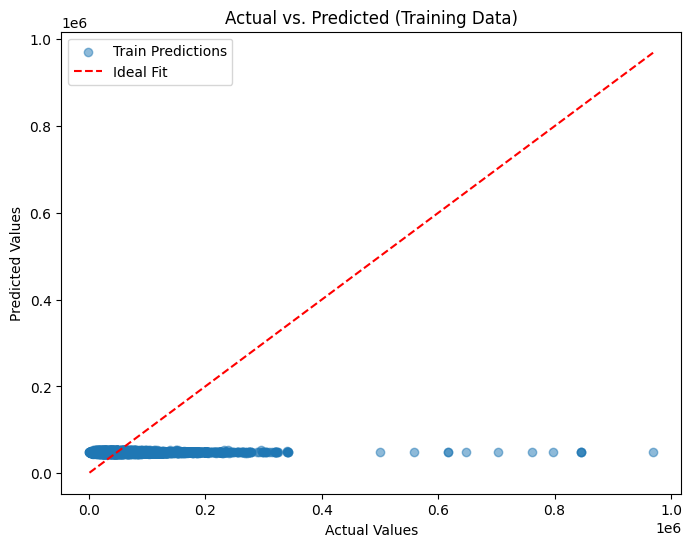

Test R² Score: -0.0003
Test RMSE: 27018.7564
Test MAE: 19521.5387


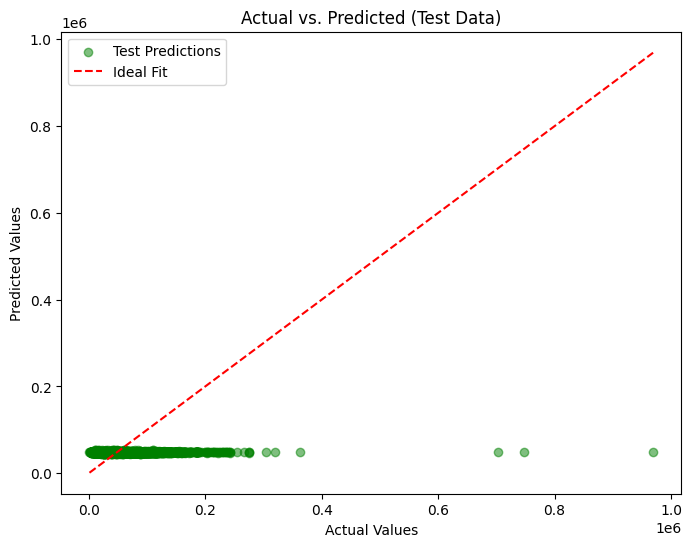

In [94]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Import necessary metrics
import matplotlib.pyplot as plt
import numpy as np

LRM_pipe = Pipeline([
    ('MAS', MaxAbsScaler()),  # Scales features to [0, 1] without distorting sparsity
    ('LRM', Ridge())          # Ridge regression
])

# Define parameter grid for Ridge
params = {
    'LRM__alpha': [0.1, 1.0, 10],  # Regularization strength
    'LRM__fit_intercept': [True, False],  # Whether to include an intercept
    'LRM__solver': ['auto', 'svd', 'cholesky', 'lsqr']  # Solvers for optimization
}

# GridSearchCV setup
gs_LRM = GridSearchCV(
    estimator=LRM_pipe,
    param_grid=params,
    scoring="r2",  # Use R² as the evaluation metric
    cv=5,          # 5-fold cross-validation
    error_score="raise",  # Raise errors for debugging
    verbose=1,            # Show progress during search
    n_jobs=-1             # Use all available CPUs
)

# Fit the model
gs_LRM.fit(X_train, y_train)

# Display best parameters and performance
print("Best Parameters:", gs_LRM.best_params_)
print("Training R² Score:", gs_LRM.best_score_)

# Evaluate the best model on training set
y_train_pred = gs_LRM.best_estimator_.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)

print(f"Training R² Score: {train_r2:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Training MAE: {train_mae:.4f}")

# Plot actual vs predicted values for training data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5, label="Train Predictions")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted (Training Data)")
plt.legend()
plt.show()

# Test set evaluation (if available)
if 'X_test' in globals() and 'y_test' in globals():
    y_test_pred = gs_LRM.best_estimator_.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_mae = mean_absolute_error(y_test, y_test_pred)

    print(f"Test R² Score: {test_r2:.4f}")
    print(f"Test RMSE: {test_rmse:.4f}")
    print(f"Test MAE: {test_mae:.4f}")

    # Plot actual vs predicted values for test data
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.5, color='green', label="Test Predictions")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Ideal Fit")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs. Predicted (Test Data)")
    plt.legend()
    plt.show()

In [23]:
from sklearn.linear_model import LinearRegression # Import the LinearRegression class

LRM = LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, positive= True)

In [24]:
LRM

LinearRegression(fit_intercept=False, n_jobs=-1, positive=True)

In [25]:
from sklearn.preprocessing import MinMaxScaler


In [26]:
MMS = MinMaxScaler()

In [27]:
MMS

MinMaxScaler()

In [28]:
MMS.fit(X_train)

MinMaxScaler()

In [29]:
X_train.shape

(112704, 47)

In [30]:
LRM = LRM.fit(X_train, y_train)

In [31]:
LRM

LinearRegression(fit_intercept=False, n_jobs=-1, positive=True)

In [ ]:
import pandas as pd
import numpy as np

# Convert X_test and X_train to Pandas DataFrames if they are not already.
X_test = pd.DataFrame(X_test, columns=X_train.columns if isinstance(X_train, pd.DataFrame) else range(X_test.shape[1]))
X_train = pd.DataFrame(X_train, columns=X_train.columns if isinstance(X_train, pd.DataFrame) else range(X_train.shape[1]))

# Now you can use reindex
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)



In [32]:
from sklearn import linear_model
clf = LinearRegression()

In [33]:
clf

LinearRegression()

In [34]:
clf = clf.fit(X_train, y_train)

In [35]:
clf

LinearRegression()

In [36]:
X_test.shape

(28177, 47)

In [37]:
y_train.shape

(112704,)

In [38]:
y_test.shape

(28177,)

In [39]:
ypred = clf.predict(X_test)

In [40]:
r2_score(y_test,ypred)

-0.0002741506083268064

In [41]:
MMS.transform(X_test)

array([[9.32806324e-01, 8.53359020e-02, 5.88235294e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [8.24110672e-01, 1.82928785e-01, 3.52941176e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.18577075e-01, 6.62877546e-03, 9.41176471e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [2.98418972e-01, 1.13976206e-04, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.98418972e-01, 4.85838933e-02, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.98418972e-01, 1.41209459e-05, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [42]:
y_pred = LRM.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Import necessary metrics

In [ ]:
r_squared = r2_score(y_test, y_pred)

In [ ]:
r_squared

-1.6964719682655374

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predictions on test set
y_pred = gs_LRM.predict(X_test)

# Test R-squared
r_squared = r2_score(y_test, y_pred)
print("Test R-squared:", r_squared)

# Test RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE:", rmse)

# Test MAE
mae = mean_absolute_error(y_test, y_pred)
print("Test MAE:", mae)

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Actual vs. Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted")
plt.legend()
plt.show()


NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
import pandas as pd

# Sample DataFrames for demonstration (replace these with your actual data)
X_train = pd.DataFrame({
    'Feature1': [1, 2],
    'Feature2': [3, 4],
})

X_test = pd.DataFrame({
    'Feature1': [5, 6],
    'Feature2': [7, 8],
})

y_train = pd.Series([10, 20], name='Actual Price')
y_test = pd.Series([30, 40], name='Actual Price')

# Sample predictions (replace these with your model's predictions)
predicted_train = pd.Series([11, 19], name='Predicted Price')  # Training predictions
predicted_test = pd.Series([32, 38], name='Predicted Price')  # Testing predictions

# Combine features, actual values, and predictions for training and testing sets
train_data = pd.concat([X_train, y_train, predicted_train], axis=1)
train_data['Set'] = 'train'  # Add a column to identify the training set

test_data = pd.concat([X_test, y_test, predicted_test], axis=1)
test_data['Set'] = 'test'  # Add a column to identify the testing set

# Concatenate train and test data
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Display the combined dataset
print("Combined Dataset with Predictions:")
print(combined_data)

# Save to a CSV file
combined_data.to_csv('combined_dataset_with_predictions.csv', index=False)


Combined Dataset with Predictions:
   Feature1  Feature2  Actual Price  Predicted Price    Set
0         1         3            10               11  train
1         2         4            20               19  train
2         5         7            30               32   test
3         6         8            40               38   test


In [ ]:
import pandas as pd
import datetime

# Load the CSV files
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

# Ensure the target variables are Series
y_train = y_train.squeeze()
y_test = y_test.squeeze()

# Combine features and targets for train and test sets
train_data = pd.concat([X_train, y_train], axis=1)
train_data['set'] = 'train'  # Label as train set

test_data = pd.concat([X_test, y_test], axis=1)
test_data['set'] = 'test'  # Label as test set

# Combine the datasets
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Sort by the set column
combined_data = combined_data.sort_values(by='set', ignore_index=True)

# Save the combined data with a timestamped filename
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f'combined_data_{timestamp}.csv'
combined_data.to_csv(filename, index=False)

print(f"Combined CSV file created successfully: {filename}")


Combined CSV file created successfully: combined_data_20241126_233740.csv


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Load the CSV files
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').squeeze()  # Ensure y is a Series
y_test = pd.read_csv('y_test.csv').squeeze()

# Reduce dataset size for testing (optional)
# X_train = X_train.sample(n=10000, random_state=42)
# y_train = y_train.loc[X_train.index]

# One-hot encode categorical features
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in X_test to match X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Train the RandomForestRegressor model
model = RandomForestRegressor(
    random_state=42,
    n_estimators=50,  # Reduced number of trees
    max_depth=10,     # Limit tree depth
    n_jobs=-1         # Parallel processing
)
model.fit(X_train, y_train)

# Generate predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Calculate metrics for training and test sets
metrics = {
    "Training R²": r2_score(y_train, train_predictions),
    "Test R²": r2_score(y_test, test_predictions),
    "Training RMSE": np.sqrt(mean_squared_error(y_train, train_predictions)),
    "Test RMSE": np.sqrt(mean_squared_error(y_test, test_predictions)),
    "Training MAE": mean_absolute_error(y_train, train_predictions),
    "Test MAE": mean_absolute_error(y_test, test_predictions),
}

# Print metrics
for key, value in metrics.items():
    print(f"{key}: {value:.4f}")

# Save predictions to a CSV file
train_data = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
train_data['Predicted_Price'] = train_predictions
train_data['Set'] = 'Train'

test_data = pd.concat([X_test, y_test.reset_index(drop=True)], axis=1)
test_data['Predicted_Price'] = test_predictions
test_data['Set'] = 'Test'

combined_data = pd.concat([train_data, test_data], ignore_index=True)
combined_data.to_csv('optimized_combined_data_with_predictions.csv', index=False)

print("Optimized combined CSV file with predictions created successfully.")


Training R²: 0.9034
Test R²: 0.8450
Training RMSE: 8375.9112
Test RMSE: 10714.4548
Training MAE: 4136.0763
Test MAE: 4395.8069
Optimized combined CSV file with predictions created successfully.


FEATURE IMPORTANCE

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute feature importance
feature_importances = model.feature_importances_

# Create a DataFrame for feature importances
importance_df = (
    pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importances
    })
    .sort_values(by='Importance', ascending=False)
    .reset_index(drop=True)
)

# Display the top 10 most important features
print("Top 10 Most Important Features:")
print(importance_df.head(10))



Top 10 Most Important Features:
                       Feature  Importance
0                      mileage         0.0
1    series_Scat Pack 392 1320         0.0
2      series_Scat Pack 392 TA         0.0
3      series_Scat Pack 392 WB         0.0
4  series_Scat Pack 392 WB Sha         0.0
5   series_Scat Pack 392 WB TA         0.0
6              series_Scorpion         0.0
7                series_Select         0.0
8           series_Select 2.0T         0.0
9           series_Select 2.5T         0.0


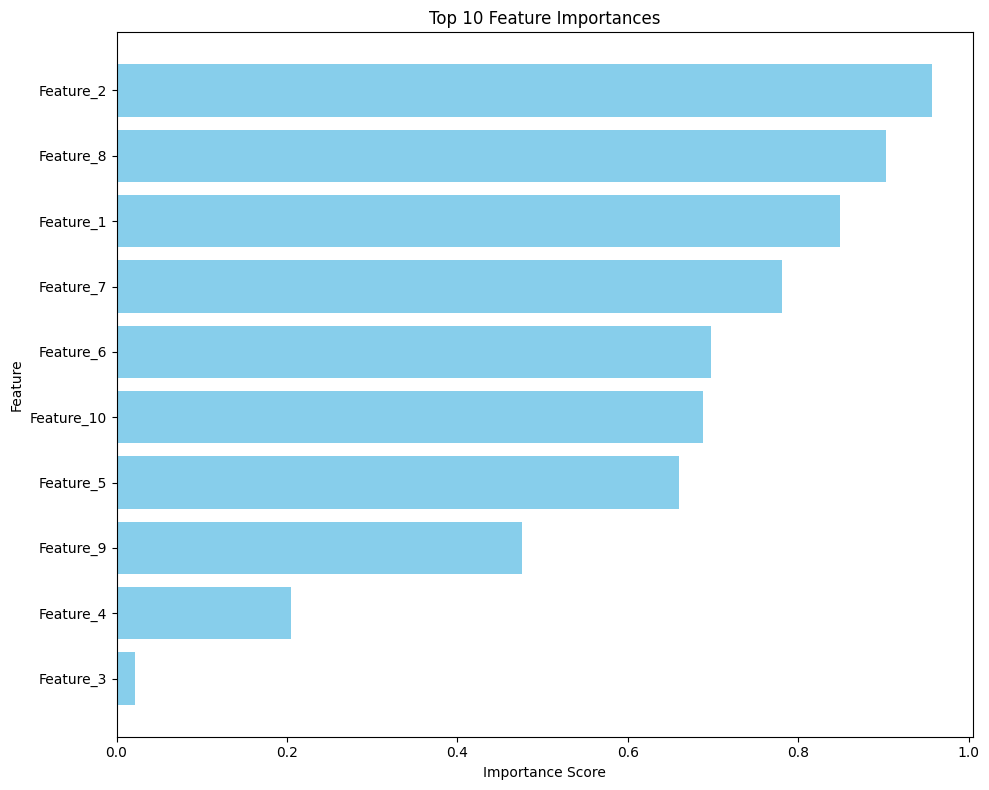

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Simulate a feature importance DataFrame (replace this with your actual DataFrame)
# Example data to mimic feature importance results
importance_df = pd.DataFrame({
    'Feature': [f'Feature_{i}' for i in range(1, 11)],
    'Importance': np.random.rand(10)  # Random importance values for demonstration
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()
plt.show()

